### 피마인디언 당뇨병 예측
* 보통 당뇨병의 원인은 식습관 유전으로 꼽음고립된 지역인 피마 지역의 인디언들은 고유의 혈통이 지속되어 왔지만
* 20세기 후반 강제 이주정책으로 인해 서구화된 식습관으로 많은 당뇨병 환자가 생겨남

* diabetes 테이터 셋 구조
    + 임신횟수, 포도당부하검사, 혈압, 삼두근피하지방측정값, 인슐린농도,
    + 비만지수, 당뇨내력가중치, 나이, 5년내 당뇨발병여부(0:음성)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [10]:
pima = pd.read_csv('pima-indian.csv')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   blood      768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabete    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
pima.head()

,pregnant,glucose,blood,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
pima.diabete.value_counts()

0    500
1    268
Name: diabete, dtype: int64

In [16]:
data = pima.iloc[:,0:7]
target = pima.diabete

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, stratify=target, random_state=2111051205)

In [19]:
lrclf = LogisticRegression(max_iter=1000)
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [21]:
accuracy_score(pred,ytest)

0.7965367965367965

In [27]:
precision_score(pred,ytest)

0.654320987654321

In [23]:
recall_score(pred,ytest)

0.7361111111111112

In [28]:
f1_score(pred,ytest) # 중요

0.6928104575163399

In [33]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       159
           1       0.65      0.74      0.69        72

    accuracy                           0.80       231
   macro avg       0.76      0.78      0.77       231
weighted avg       0.81      0.80      0.80       231



In [44]:
pred_proba = lrclf.predict_proba(Xtest)[:,1]
fprs,tprs, _ = roc_curve(ytest, pred_proba)

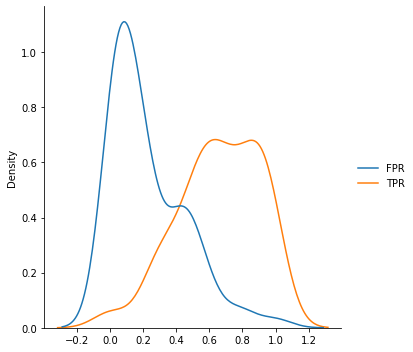

In [45]:
roc = pd.DataFrame({'FPR':fprs, 'TPR':tprs})
sns.displot(roc.iloc[:, [0,1]], kind='kde')

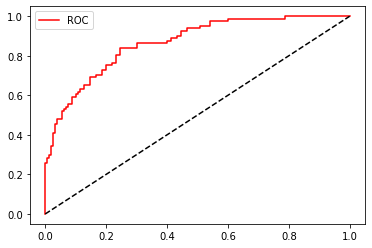

In [49]:
plt.plot(fprs, tprs, 'r', label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.legend()

In [47]:
roc_auc_score(ytest, pred)

0.7638271604938272

### 유방암 진찰 예측 
* sklearn에서 제공하는 dataset 중 하나 - breast cancer
* 위스콘신 대학 유방암 진단 데이터
* 30+1변수, 569개의 데이터로 구성
* 반경, 질감, 둘레, 면적, 매끄러움, 크기,
* 오목함, 대칭여부, 3차원진단
* 각종 통계수치(평균,표준편차,최악에 대한 평균)

In [50]:
from sklearn.datasets import load_breast_cancer

In [64]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [65]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [68]:
print(cancer.target_names) # 악성 / 정상

['malignant' 'benign']


In [69]:
pd.Series(cancer.target).value_counts()

1    357
0    212
dtype: int64

In [70]:
Xtrain, Xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, train_size=0.7, stratify=cancer.target, random_state=2111051505)

In [75]:
lrclf = LogisticRegression(max_iter=3000)
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [76]:
accuracy_score(pred,ytest)

0.9532163742690059

In [79]:
print(precision_score(pred,ytest))

0.9719626168224299


In [80]:
print(recall_score(pred,ytest))

0.9541284403669725


In [81]:
print(f1_score(pred,ytest))

0.962962962962963


In [82]:
confusion_matrix(pred,ytest)

array([[ 59,   3],
       [  5, 104]])

In [84]:
pred_proba = lrclf.predict_proba(Xtest)[:,1]
fprs,tprs,_ = roc_curve(ytest,pred_proba)

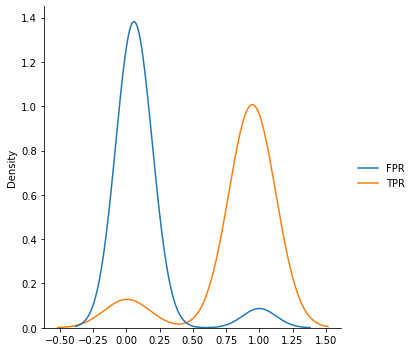

In [86]:
roc = pd.DataFrame({'FPR':fprs, 'TPR':tprs})
sns.displot(roc.iloc[:, [0,1]], kind='kde')

In [87]:
roc_auc_score(ytest,pred)

0.946918808411215

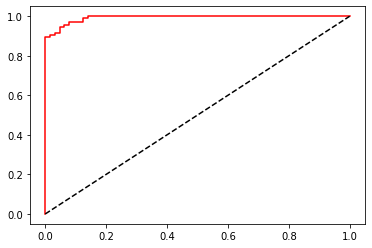

In [89]:
plt.plot(fprs, tprs, 'r', label='ROC')
plt.plot([0,1], [0,1], 'k--')

In [ ]:
# iris 데이터셋 중 petal length와 width에 대해 
# 로지스틱 회귀로 분석한 후 정확도/특이도/재현율(민감도)/F1스코어를 구한 다음
# ROC 그래프와 AUC를 확인해보세요